Project Objective: 

To design and implement a machine learning–driven dynamic pricing system that adjusts
prices in real-time or periodically to maximize revenue and maintain competitiveness.
The system will leverage historical sales, inventory to predict optimal prices using advanced
ML techniques.
By ensuring adaptability and transparency, the platform will help businesses increase
profitability while preserving customer trust.

Milestone 1:

collect data from kaggle Dynamic pricing dataset - https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset/data

install required libraries


26-09-2025

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn scipy


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install xgboost lightgbm catboost
!pip install flask fastapi uvicorn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install joblib


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 1: Import Libraries

In [3]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
plt.style.use('classic')
sns.set_theme(style="whitegrid")


Step 2: Load Dataset

In [4]:
# Load the CSV file
df = pd.read_csv('dynamic_pricing.csv')

# Show first few rows
df.head()        #head()=> gives a preview of first 5 rows.


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


2.Feature Engineering:

clean and aggregate datasets 

Step 3: Understand the size, columns, data types, and basic stats of numerical features.

In [3]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Columns
print("\nColumns:", df.columns.tolist())

# Data types and memory usage
df.info()

# Summary statistics for numerical columns
df.describe()


Dataset shape: (1000, 10)

Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


Step 4: Identify missing or duplicate data that may require cleaning.

In [4]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Missing Count', 'Missing Percent']
print("\nMissing Values:")
print(missing_data[missing_data['Missing Count'] > 0])

# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []

Number of duplicate rows: 0


Step 5: Separate Numerical & Categorical Columns

In [5]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print("Numerical Columns:", numerical_columns.tolist())
print("Categorical Columns:", categorical_columns.tolist())


Numerical Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
Categorical Columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


Step 6: Exploratory Visualizations

6.1 Numerical Feature Distributions

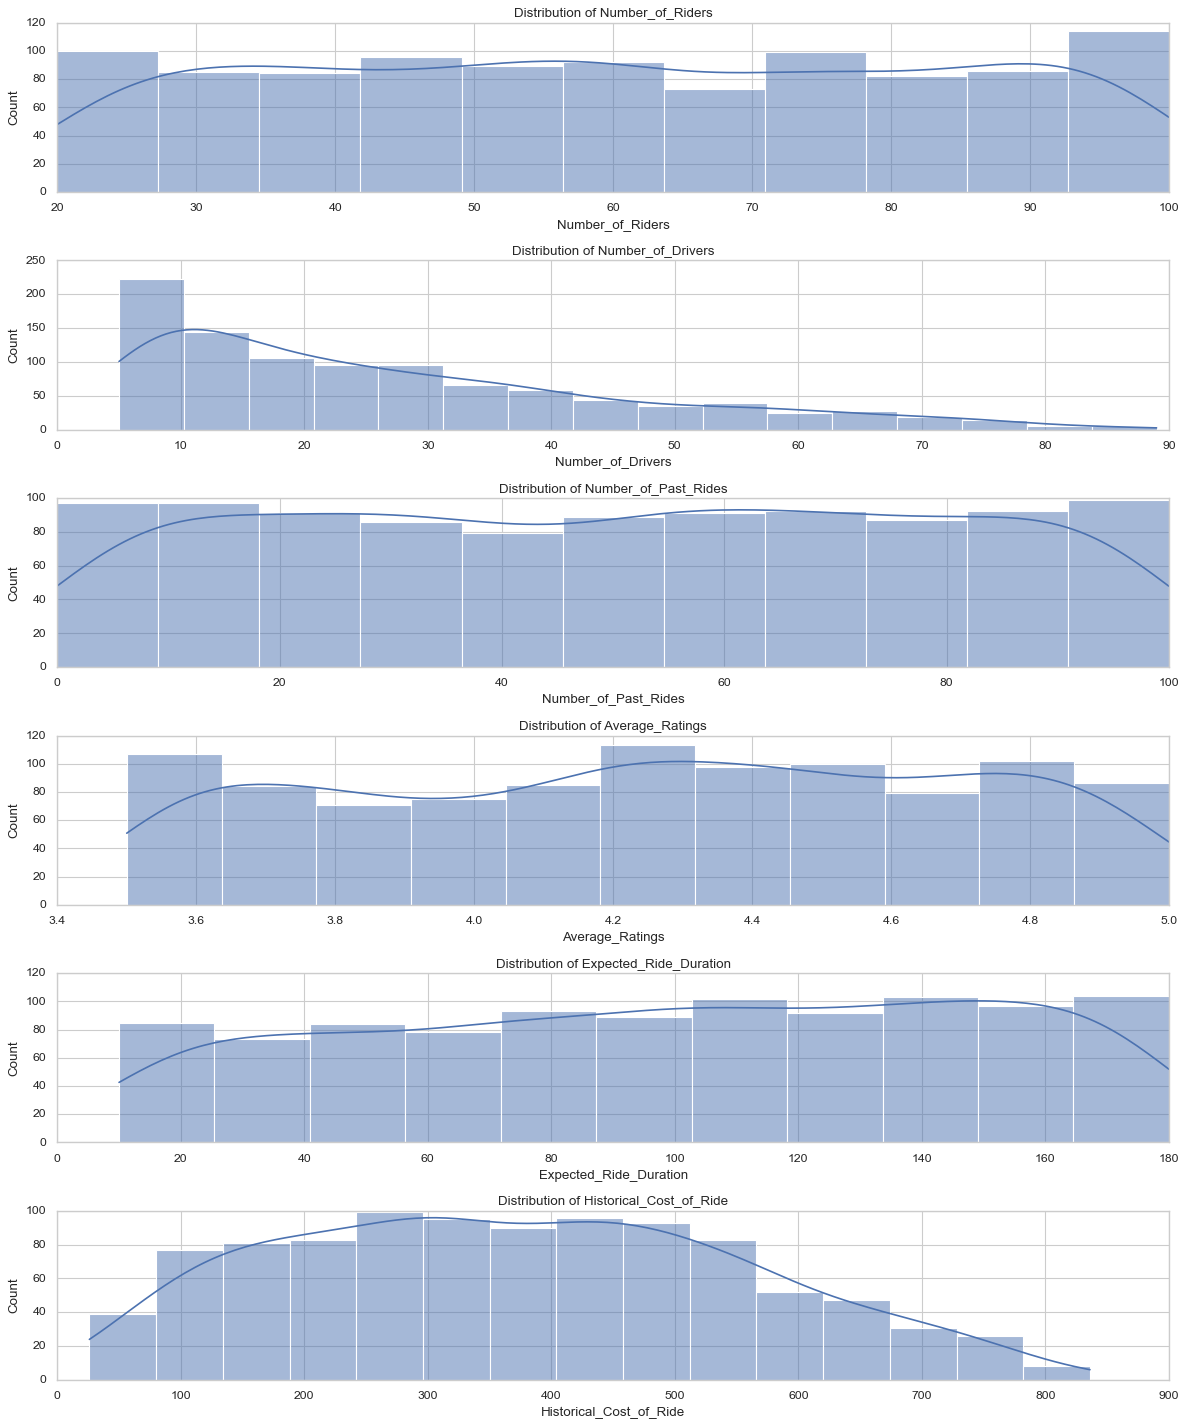

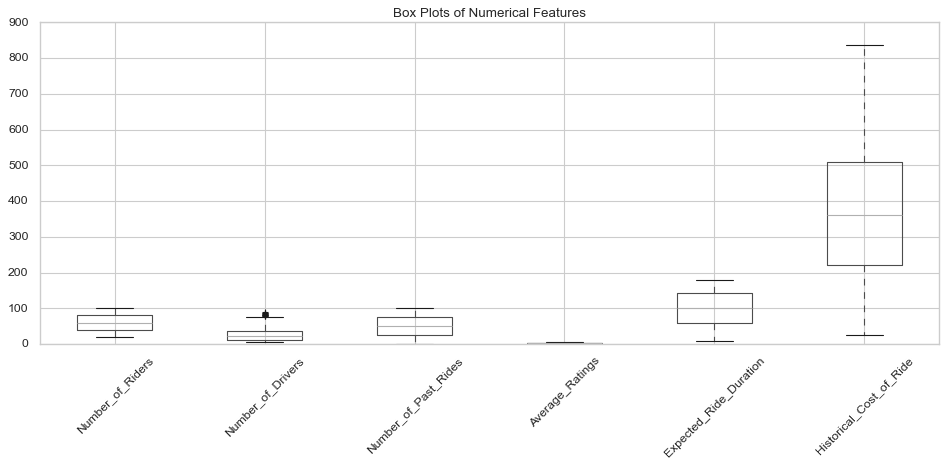

In [6]:
# Histograms
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()


6.2 Categorical Feature Distributions

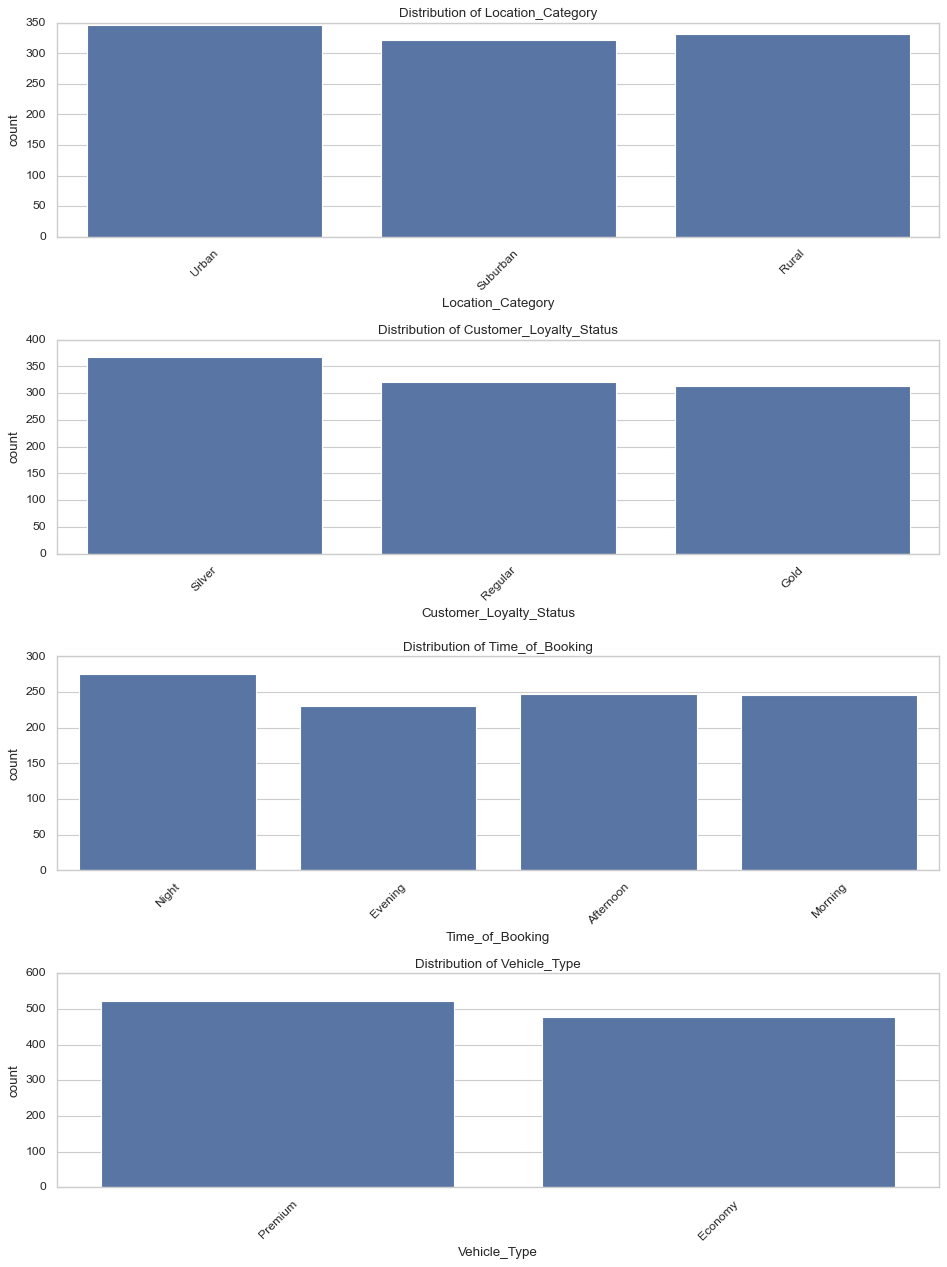

In [7]:
# Count plots
if len(categorical_columns) > 0:
    plt.figure(figsize=(12, 4 * len(categorical_columns)))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns), 1, i)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Step 7: Correlation Analysis

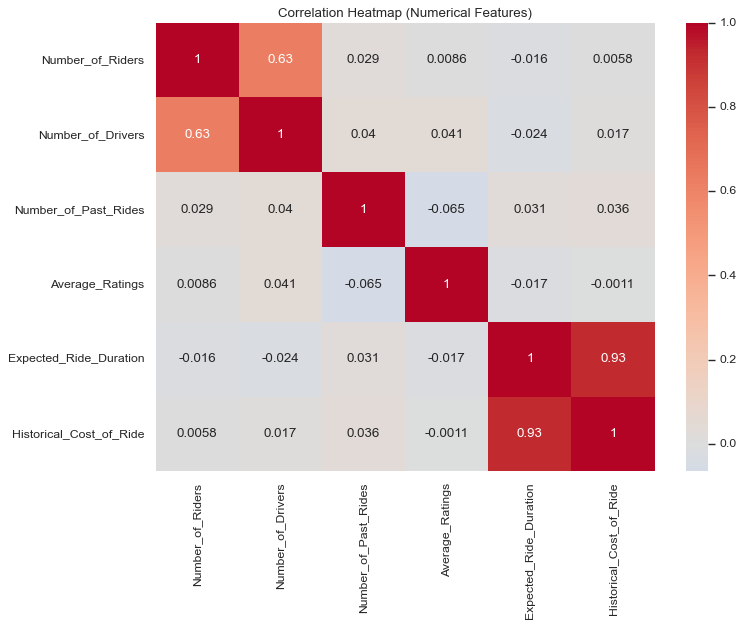

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()


Step 8: Outlier Detection

8.1 Using Boxplots

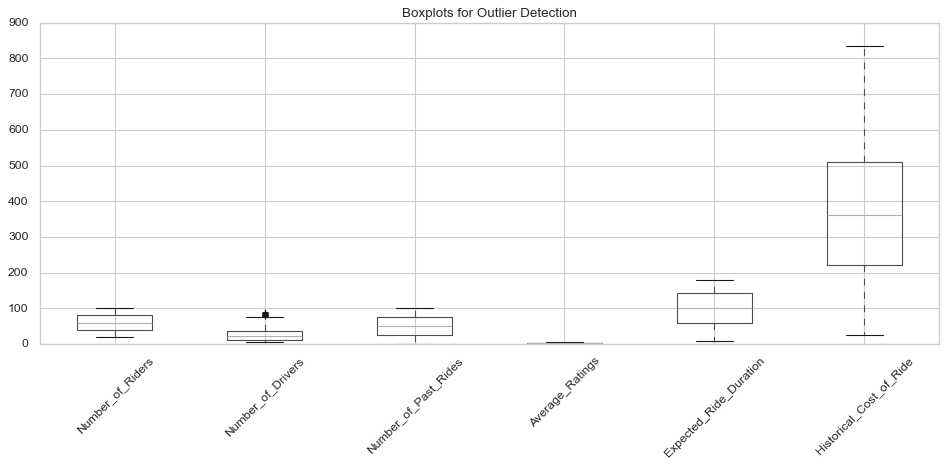

In [9]:
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()


8.2 Using IQR Method

In [10]:
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers[col] = outlier_indices

# Summary
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")


Number_of_Riders: 0 outliers
Number_of_Drivers: 10 outliers
Number_of_Past_Rides: 0 outliers
Average_Ratings: 0 outliers
Expected_Ride_Duration: 0 outliers
Historical_Cost_of_Ride: 0 outliers


Step 9: Linearity Check (Numerical vs Target)

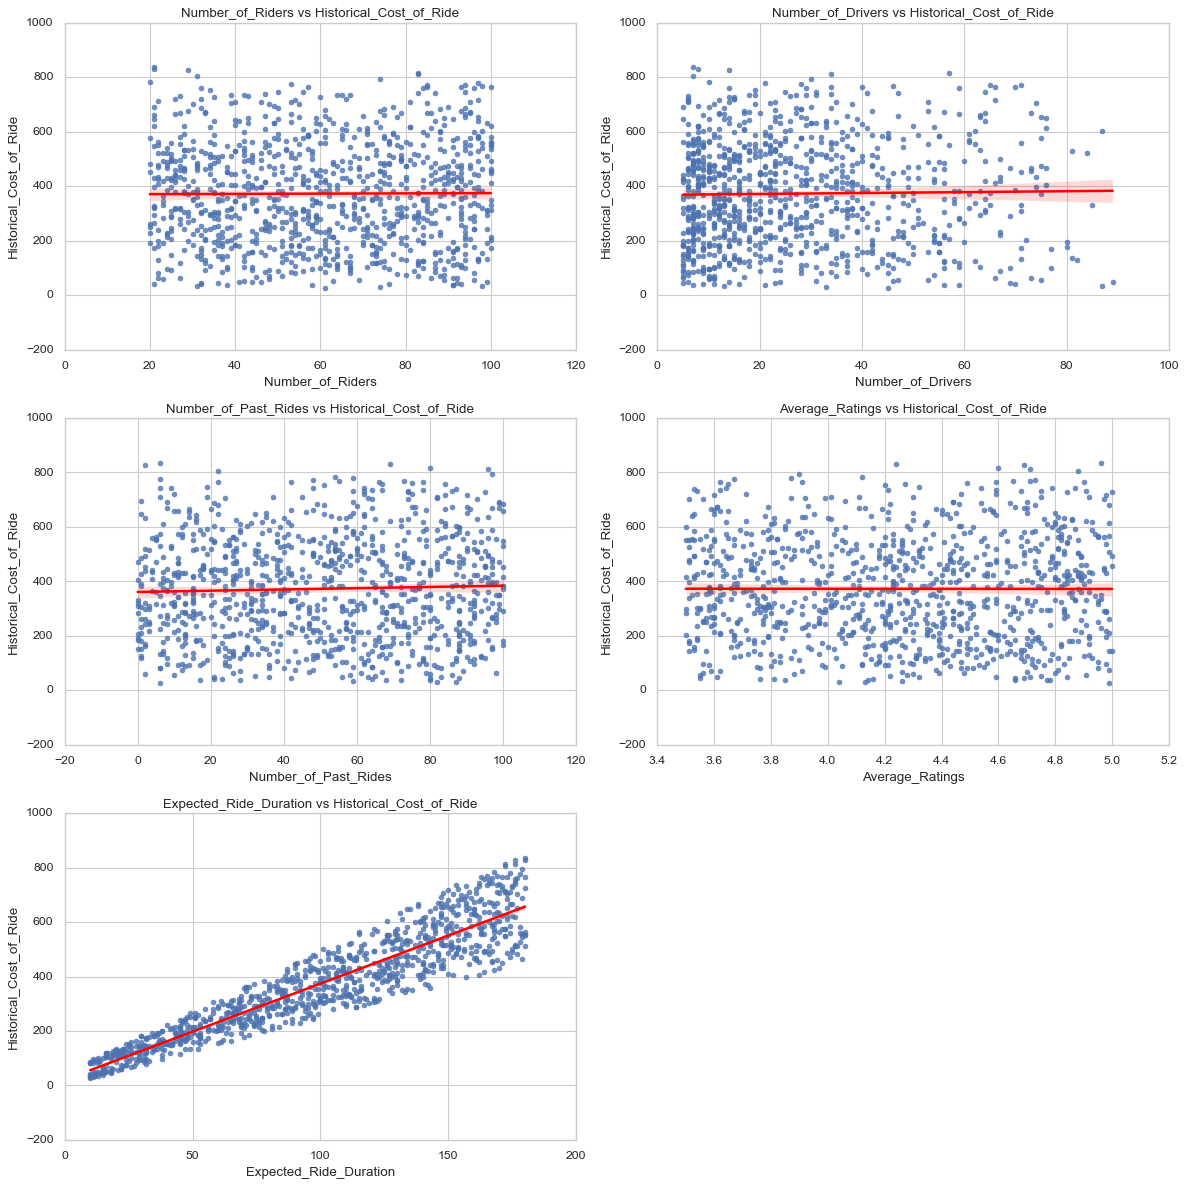

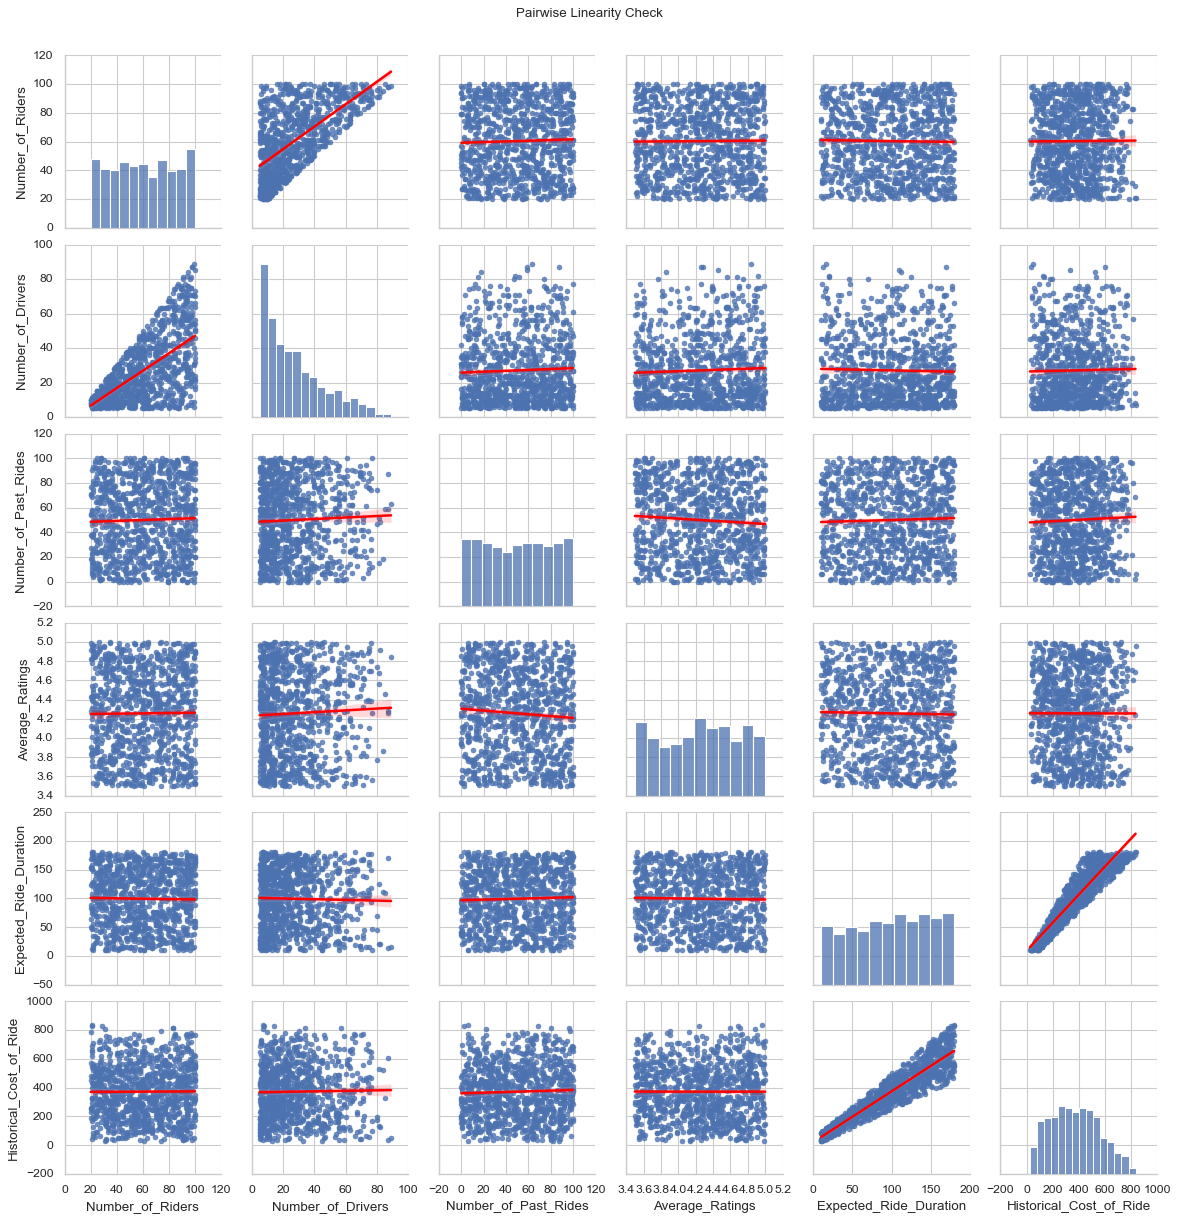

In [11]:
target_col = "Historical_Cost_of_Ride"
num_cols_excl_target = numerical_columns.drop(target_col)

# Scatter plots with regression line
n_cols = 2
n_rows = (len(num_cols_excl_target) + 1) // n_cols
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(num_cols_excl_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.regplot(x=df[col], y=df[target_col], line_kws={"color": "red"})
    plt.title(f"{col} vs {target_col}")

plt.tight_layout()
plt.show()

# Pairplot for overall linearity
sns.pairplot(df[num_cols_excl_target.tolist() + [target_col]], kind="reg",
             plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle("Pairwise Linearity Check", y=1.02)
plt.show()


29-09-2025

Task 1: Handle Categorical Variables (Encoding)

In [5]:
# Identify categorical columns again
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Apply One-Hot Encoding (for nominal categories like Vehicle_Type)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()


Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,4.47,90,284.257273,False,True,False,True,False,False,True,True
1,58,39,72,4.06,43,173.874753,True,False,False,True,True,False,False,False
2,42,31,0,3.99,76,329.795469,False,False,False,True,False,False,False,True
3,89,28,67,4.31,134,470.201232,False,False,True,False,False,False,False,True
4,78,22,74,3.77,149,579.681422,False,False,True,False,False,False,False,False


In [6]:
#If categories are ordinal (like Loyalty_Status: Bronze < Silver < Gold), use Label Encoding instead
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Customer_Loyalty_Status'] = le.fit_transform(df['Customer_Loyalty_Status'])


Task 2: Summary Statistics

In [7]:
# Summary stats for numerical features
print(df.describe())

# Summary stats for categorical features
print(df.describe(include=['object']))


       Number_of_Riders  Number_of_Drivers  Customer_Loyalty_Status  \
count       1000.000000        1000.000000              1000.000000   
mean          60.372000          27.076000                 1.054000   
std           23.701506          19.068346                 0.823263   
min           20.000000           5.000000                 0.000000   
25%           40.000000          11.000000                 0.000000   
50%           60.000000          22.000000                 1.000000   
75%           81.000000          38.000000                 2.000000   
max          100.000000          89.000000                 2.000000   

       Number_of_Past_Rides  Average_Ratings  Expected_Ride_Duration  \
count           1000.000000      1000.000000              1000.00000   
mean              50.031000         4.257220                99.58800   
std               29.313774         0.435781                49.16545   
min                0.000000         3.500000                10.00000   


Task 3: Correlations

In [8]:
# Correlation matrix for numerical variables
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

# Sort correlations with target
target_col = "Historical_Cost_of_Ride"
print(corr_matrix[target_col].sort_values(ascending=False))


                         Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Customer_Loyalty_Status          0.002304          -0.012505   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Customer_Loyalty_Status  Number_of_Past_Rides  \
Number_of_Riders                        0.002304              0.029265   
Number_of_Drivers                      -0.012505              0.039660   
Customer_Loyalty_Status                 1.000000              0.035519   
Number_of_Past_Rides                    0.035519              1.000000   
Average_Ratings                         0.067968             -0.064734   
Expected_Ride_Duration                 -0.0

Task 4: Price vs Ride using Scatterplot

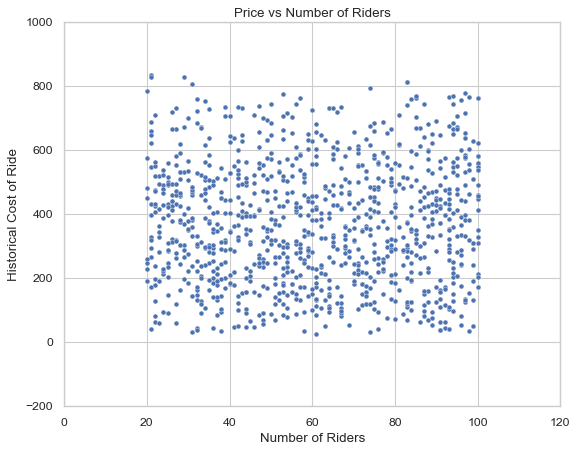

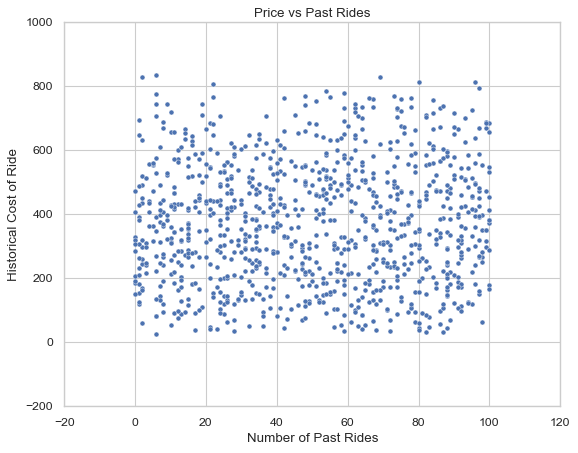

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Number_of_Riders'], y=df['Historical_Cost_of_Ride'])
plt.title("Price vs Number of Riders")
plt.xlabel("Number of Riders")
plt.ylabel("Historical Cost of Ride")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Number_of_Past_Rides'], y=df['Historical_Cost_of_Ride'])
plt.title("Price vs Past Rides")
plt.xlabel("Number of Past Rides")
plt.ylabel("Historical Cost of Ride")
plt.show()


Task 5: Other EDA

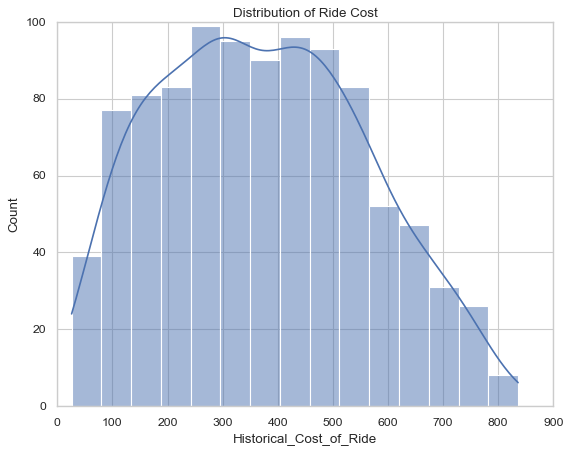

In [10]:
sns.histplot(df['Historical_Cost_of_Ride'], kde=True)
plt.title("Distribution of Ride Cost")
plt.show()


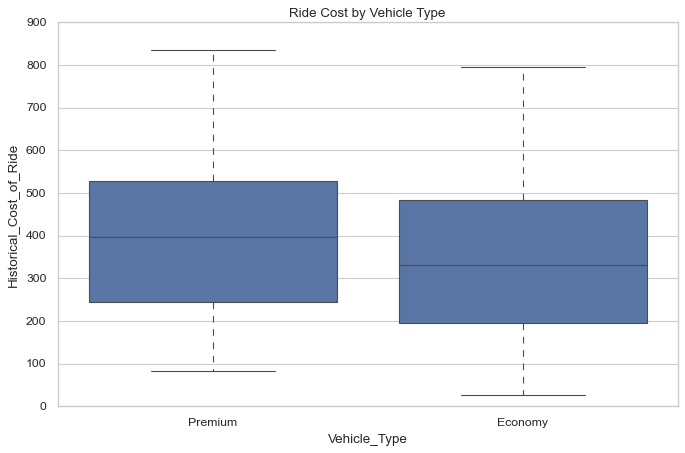

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Vehicle_Type", y="Historical_Cost_of_Ride", data=df)
plt.title("Ride Cost by Vehicle Type")
plt.show()


In [12]:
pd.crosstab(df['Location_Category'], df['Vehicle_Type'])


Vehicle_Type,Economy,Premium
Location_Category,,
Rural,153,179
Suburban,158,164
Urban,167,179


Task 6: Fill NA Values (Handling Missing Data)

In [13]:
# Check missing values
print(df.isnull().sum())

# Fill numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)  # median is safer for skewed data

# Fill categorical columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # mode for categorical


Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


C:\Users\Rokade\AppData\Local\Temp\ipykernel_12656\2003130292.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # median is safer for skewed data
C:\Users\Rokade\AppData\Local\Temp\ipykernel_12656\2003130292.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

Task 7: Clean the CSV Sheet

In [14]:
df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as cleaned_dataset.csv")


Cleaned dataset saved as cleaned_dataset.csv


Task 8: Read about KPIs

30-09-25

Segmentations (Groupby Analysis)

In [15]:
# Average ride cost by Customer Loyalty
loyalty_seg = df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean()
print("\nAverage ride cost by Loyalty Status:")
print(loyalty_seg)

# Average ride cost by Location
location_seg = df.groupby("Location_Category")["Historical_Cost_of_Ride"].mean()
print("\nAverage ride cost by Location:")
print(location_seg)

# Average ride cost by Vehicle Type
vehicle_seg = df.groupby("Vehicle_Type")["Historical_Cost_of_Ride"].mean()
print("\nAverage ride cost by Vehicle Type:")
print(vehicle_seg)



Average ride cost by Loyalty Status:
Customer_Loyalty_Status
0    376.118746
1    380.125251
2    362.772140
Name: Historical_Cost_of_Ride, dtype: float64

Average ride cost by Location:
Location_Category
Rural       379.942172
Suburban    374.319486
Urban       363.673259
Name: Historical_Cost_of_Ride, dtype: float64

Average ride cost by Vehicle Type:
Vehicle_Type
Economy    346.573399
Premium    396.246242
Name: Historical_Cost_of_Ride, dtype: float64


Scatter Plot (Riders vs. Price)

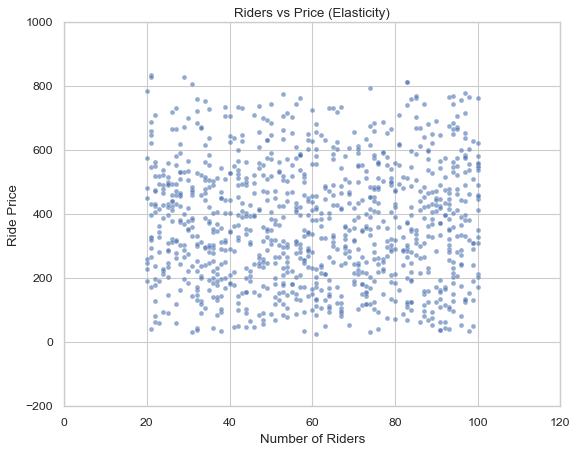

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Number_of_Riders", y="Historical_Cost_of_Ride", data=df, alpha=0.6)
plt.title("Riders vs Price (Elasticity)")
plt.xlabel("Number of Riders")
plt.ylabel("Ride Price")
plt.show()


Boxplot by Location (Cost Distribution)

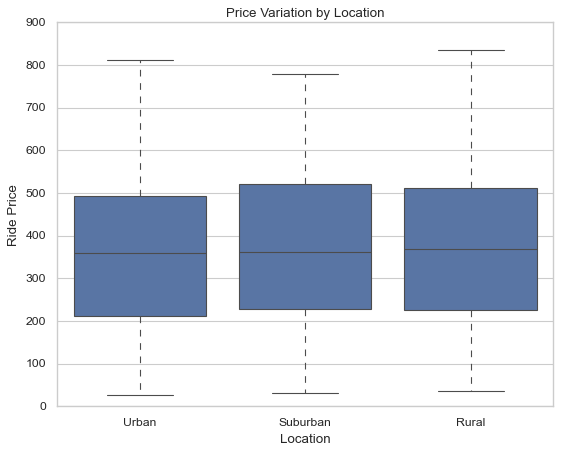

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Location_Category", y="Historical_Cost_of_Ride", data=df)
plt.title("Price Variation by Location")
plt.xlabel("Location")
plt.ylabel("Ride Price")
plt.show()


In [18]:
# Save cleaned/encoded dataset
df_encoded.to_csv("cleaned_csv_data.csv", index=False)
print("Cleaned dataset saved as cleaned_csv_data.csv")


Cleaned dataset saved as cleaned_csv_data.csv
